# Homework 5: Coding

**Due Monday October 28th, 11:59pm.**

**This is an individual assignment.**

**Submit hw5.py file to Gradescope (you may submit as many times as you'd like before the deadline).**

In [0]:
"""
Import libraries that you might require.

DON'T comment out these imports when submitting your final hw5.py file.
"""

import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import sklearn.model_selection as ms
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler


# Question 3: Simple PCA

In this assignment, we will implement Principal Component Analysis and perform it on a simple 2-dimensional dataset. One way to perform PCA is by doing an eigenvalue decomposition of a data covariance matrix, which we will implement here.

## PCA Implementation

First fill out these helper functions. **You are allowed to use numpy functions as needed**:

In [0]:
def get_cov_mat(X):
  """
  Returns a covariance matrix of the given input matrix
  
  Args:
      X ((n,p) np.ndarray): The input data
  Returns:
      X_cov ((p,p) np.ndarray): The input data
  """  
  
  p = X.shape[1]  
  
  eig_vecs_sorted = np.zeros((p,p))

  # <---- Start your code here ----->
  
  X_cov = np.cov(X, rowvar=False)

  # <---- End your code here ----->
  
  # confirm the shape of your output
  assert X_cov.shape == (p,p)
  
  return X_cov


def get_eig(cov_mat):
  """
  Returns eigenvectors and eigenvalues in sorted order by eigenvalue
  given input covariance matrix
  
  Args:
      cov_mat ((p,p) np.ndarray): The input covariance matrix
  Returns:
      eig_vals_sorted ((p,) np.ndarray): Eigenvalues in decreasing order
      eig_vecs_sorted ((p,p) np.ndarray): Eigenvectors corresponding to the 
                                          sorted eigenvalues, eig_vecs_sorted[:, i]
                                          corresponds to the ith vector
                                          (i.e. each column is an eigenvector)
  """  
  
  p = cov_mat.shape[1]
  eig_vals_sorted = np.zeros(p)
  eig_vecs_sorted = np.zeros((p,p))
  
  # <---- Start your code here ----->
  
#   print('IN get_eig')
  eig_vals, eig_vecs = np.linalg.eig(cov_mat)
  
  idx_sort = np.argsort(-eig_vals)
  eig_vals_sorted = eig_vals[idx_sort]
  eig_vecs_sorted = eig_vecs[:, idx_sort]

  # <---- End your code here ----->  
  
  # confirm the shapes of your output
  assert eig_vals_sorted.shape == (p,)  
  assert eig_vecs_sorted.shape == (p,p)  
    
  return eig_vals_sorted, eig_vecs_sorted
  
    
def get_projection(X, principal_components):
  """
  Returns the projection of X onto the principal components
  
  Args:
      X ((n,p) np.ndarray): The input data
      principal_components ((p,p) np.ndarray): Principal components of data
  Returns:
      projection ((n,p) np.ndarray): The projection of X onto the components
  """  

  n = X.shape[0]
  p = X.shape[1]

  projection = np.zeros((n,p))
 
  # <---- Start code here ----->
  
#   print('IN get_projection')
  projection = X @ principal_components
  
  # <---- End code here ----->  

  # confirm the shape of your output
  assert projection.shape == (n,p)

  return projection

Next, fill out this main function for PCA using the helper functions above

In [0]:
def pca(X):
  """
  Performs PCA on dataset X.
  
  Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix                 
  
  Returns:
    projected ((n, p) np.ndarray): Samples projected on reduced dimensions
    values ((p,) np.ndarray): Singular Values
    components ((p, p) np.ndarray): Principal Components (also eigenvectors)
  """

  n = X.shape[0]
  p = X.shape[1]

  projection = np.zeros((n,p))
  components = np.zeros((p,p))
  values = np.zeros(p)

  # <---- Start code here ----->  
  
#   print('IN pca')
  X_cov = get_cov_mat(X)
  eig_vals, eig_vecs = get_eig(X_cov)
  projection = get_projection(X, eig_vecs)
    
  components = eig_vecs
#   values = np.sqrt(eig_vals)
  values = eig_vals

  # <---- End code here ----->  

  # confirm the shape of your outputs
  assert projection.shape == (n,p)
  assert values.shape == (p,)
  assert components.shape == (p,p)

  return projection, components, values

In [0]:
"""
Load data (Two features from Sk-Learn Wine Dataset).

Please remember to comment out this code before downloading your .py file.
"""

# data = load_wine().data[:, [0, 12]]
# X = StandardScaler().fit_transform(data)

# print('X.shape', X.shape)
# # print('X', X)

X.shape (178, 2)
X [[ 1.51861254  1.01300893]
 [ 0.24628963  0.96524152]
 [ 0.19687903  1.39514818]
 [ 1.69154964  2.33457383]
 [ 0.29570023 -0.03787401]
 [ 1.48155459  2.23903902]
 [ 1.71625494  1.72952002]
 [ 1.3086175   1.74544249]
 [ 2.25977152  0.94931905]
 [ 1.0615645   0.94931905]
 [ 1.3580281   2.43010864]
 [ 1.38273339  1.69767508]
 [ 0.92568536  1.82505483]
 [ 2.16095032  1.28369089]
 [ 1.70390229  2.54793491]
 [ 0.77745356  1.79320989]
 [ 1.60508109  1.69767508]
 [ 1.02450655  1.22000102]
 [ 1.46920194  2.97147258]
 [ 0.78980621  0.3124203 ]
 [ 1.3086175   0.10542821]
 [-0.08723191  0.07358327]
 [ 0.87627476  0.91747411]
 [-0.18605311  0.85378424]
 [ 0.61686912  0.3124203 ]
 [ 0.06099988  0.2646529 ]
 [ 0.48098997  1.42699311]
 [ 0.36981612  1.71359755]
 [ 1.07391715  0.53533487]
 [ 1.2592069   0.91747411]
 [ 0.90098006  1.71359755]
 [ 0.71569031  2.44603111]
 [ 0.83921681  0.7741719 ]
 [ 0.93803801  1.55437286]
 [ 0.62922177  1.10854374]
 [ 0.59216382  0.55125733]
 [ 0.3451

Call your pca function on sample 2-dimensional set, centering X on its mean first.

### 3.1 Answer on LaTeX
What can you say about the relationship between the first principal component and the second?

In [0]:
"""
Please remember to comment out this code before downloading your .py file.
"""

# X_mean = np.mean(X, axis=0)
# projected, components, values = pca(X - X_mean)
# print(components)
# print(values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[1.65300659 0.35829284]


### 3.2 Answer on LaTeX
Now plot the given points (with both axis in same scale) as well as the lines representing the principal components in original space, with x1 in the x axis and x2 in the y axis. Paste the graph and please describe how the principal components relate to the points.

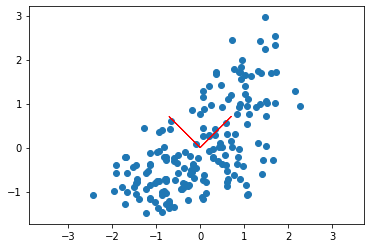

In [0]:
"""
Please remember to comment out this code before downloading your .py file.
"""

# mean_vec = np.mean(X, axis=0)

# plt.arrow(mean_vec[0], mean_vec[1], components[0, 0], components[1, 0], ec='red')
# plt.arrow(mean_vec[0], mean_vec[1], components[0, 1], components[1, 1], ec='red')
# plt.axis('equal')
# plt.scatter(X[:, 0], X[:, 1])

### 3.3 Answer on LaTeX
Now plot the given points (with both axis in same scale) in principal component space, with x-axis representing the projection of the first component and the y-axis representing the component on the second. Paste the graph.
1. Explain how the graph of points on principal component space relates to the graph of points on original space above.
1. Explain the difference in distribution of points projected on the first component vs. projected on the second.

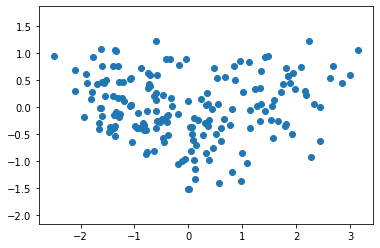

In [0]:
"""
Please remember to comment out this code before downloading your .py file.
"""

# plt.axis('equal')
# plt.scatter(projected[:, 0], projected[:, 1])

# Question 4: Eigenfaces

Now we will perform PCA on images of faces and see how reducing the dimensions of our images affects the images themselves. First start by uncommenting the code below to retrieve the faces dataset.

In [0]:
"""
Load data (Faces Dataset).

Please remember to comment out this code before downloading your .py file.
"""

# from sklearn.datasets import fetch_olivetti_faces

# faces = fetch_olivetti_faces(shuffle=True, random_state = 10)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [0]:
"""
Preprocess data

Please remember to comment out this code before downloading your .py file.
"""

# n_samples, h, w = faces.images.shape
# X_images = faces.data
# y_names = faces.target
# n_features = X_images.shape[1]

# print("Total dataset size:")
# print("n_samples: %d" % n_samples)
# print("n_features: %d" % n_features)

Total dataset size:
n_samples: 400
n_features: 4096


### PCA with SVD
PCA can also be implemented using Singular Value Decomposition on the data itself. Implement an alternative form of PCA below using SVD **Please call the np.linalg.svd function for SVD**.

In [0]:
def pca2(X, n_pc):
  """
  Performs PCA on dataset X
  
  Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix                 
    n_pc: The number of principal components
  
  Returns:
    projected ((n, min(n, n_pc)) np.ndarray): Samples projected on reduced dimensions
    components ((n_pc, p) np.ndarray): Principal Components (also eigenvectors)
    values ((min(n, n_pc),) np.ndarray): Singular Values    
    mean ((p,) np.ndarray): Mean of features
    centered_data ((n, p) np.ndarray): Data with the mean subtracted
  """
  
  n, p = X.shape
  
  projected = np.zeros((n, min(n, n_pc)))
  components = np.zeros((n_pc, p))
  values = np.zeros(min(n, n_pc),)
  mean = np.zeros(p,)
  centered_data = np.zeros((n,p))

  # <---- Start code here -----> 
    
  mean = np.mean(X, axis=0)
  centered_data = X - mean
  u, s, vh = np.linalg.svd(centered_data, full_matrices=False)
#   print('u.shape', u.shape)
#   print('s.shape', s.shape)
#   print('vh.shape', vh.shape)
  if n_pc <= n:
      values = s[0:n_pc]
      components = vh[0:n_pc, :]
#       components = components.T
      projected = centered_data @ components.T
  else:
      values = s
      components = vh
#       components = components.T
      projected = centered_data @ components.T

#   print('components.shape', components.shape)
#   print('(n_pc, p)', (n_pc, p))
#   print('==============')
#   print('projected.shape', projected.shape)
#   print('(n, min(n, n_pc))', (n, min(n, n_pc)))
  # <---- End code here -----> 
  
  assert projected.shape == (n, min(n, n_pc))  
#   assert components.shape == (n_pc, p)  
  assert components.shape == (min(n, n_pc), p)  
  assert values.shape == (min(n, n_pc),)
  assert mean.shape == (p,)  
  assert centered_data.shape == (n, p)    

  return projected, components, values, mean, centered_data

## Helper functions

In [0]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
  """
  Plots portraits of images
  
  Args:
    images ((n,p) np.ndarray): The input images in a vector format
    titles (list string): The list of names for each image
    h (int): The input height of the portraits
    w (int): The input height of the portraits
    n_row (int): The number of rows to display of images
    n_col (int): The number of columns to display of images
  """  
  
  plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
  for i in range(n_row * n_col):
      plt.subplot(n_row, n_col, i + 1)
      plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
      plt.title(titles[i])
      plt.xticks(())
      plt.yticks(())

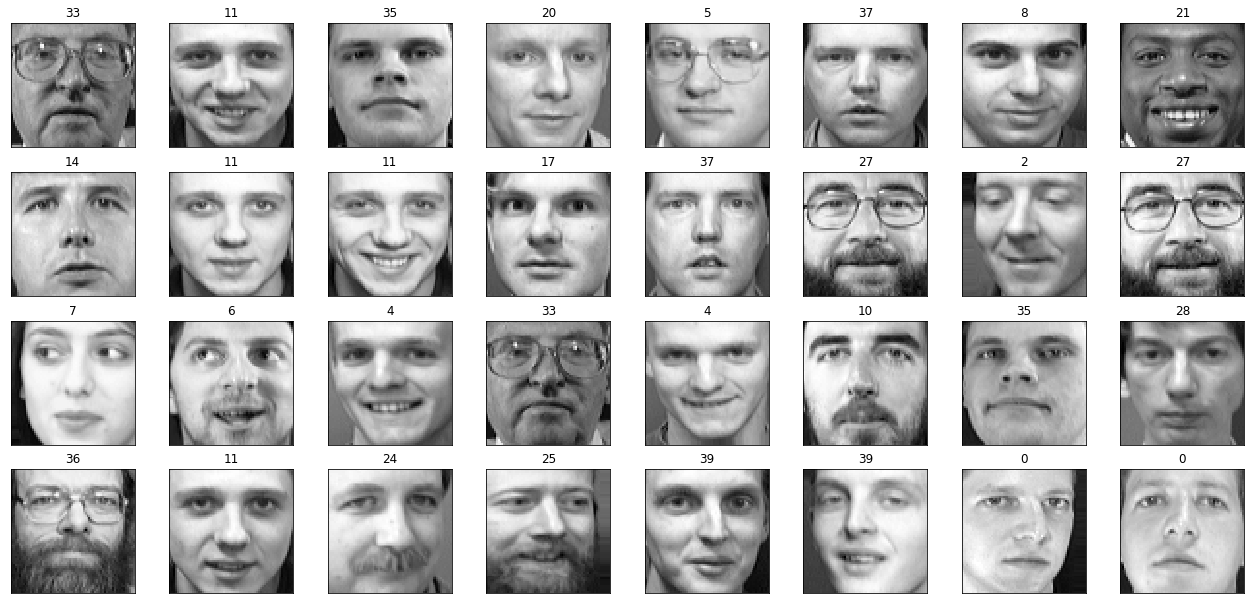

In [0]:
"""
Please remember to comment out this code before downloading your .py file.
"""

# plot_portraits(X_images, y_names, h, w, n_row=4, n_col=8)

Now run the script below that takes the image matrix of n rows by h*w features and runs PCA on this X with 50 components and plot the images of the eigenvectors (which you will have to unwrap back into the image shape.)

X_images.shape (400, 4096)
u.shape (400, 400)
s.shape (400,)
vh.shape (400, 4096)
components.shape (400, 4096)
(n_pc, p) (400, 4096)
projected.shape (400, 400)
(n, min(n, n_pc)) (400, 400)
C.shape (400, 4096)
P.shape (400, 400)


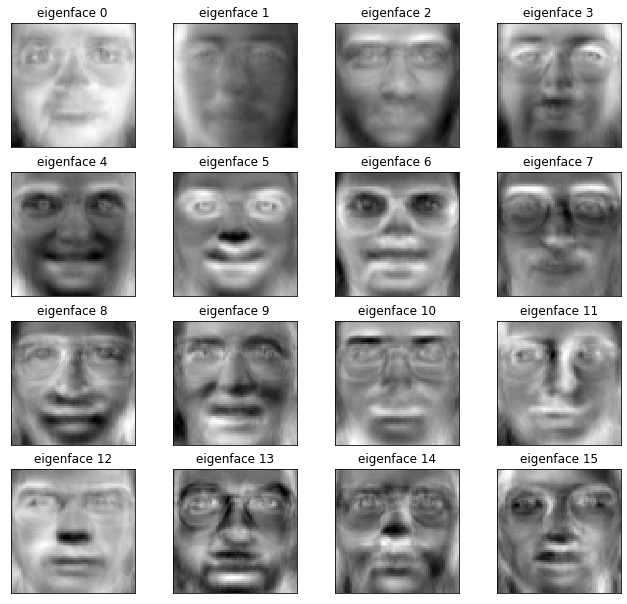

In [0]:
"""
Please remember to comment out this code before downloading your .py file.
"""

# n_components = 400  # orig:50
# print('X_images.shape', X_images.shape)
# P, C, V, M, Y = pca2(X_images, n_components)
# print('C.shape',C.shape)
# print('P.shape',P.shape)

# eigenfaces = C.reshape((n_components, h, w))
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4)

### Question 4.1 Answer on Latex
Paste the eigenfaces on LaTeX. Please describe what the eigenfaces look like. Please describe what the eigenfaces look like. What do you expect to observe with the eigenfaces associated with lower eigenvalues?

## Reconstructing faces
Now implement a function to reconstruct a face given projected data points

In [0]:
def reconstruction(P, C, M, h, w, image_index):
  """
  Reconstructs an image with the given components
  
  Args:
    P, projected ((n, n_pc) np.ndarray): Samples projected on reduced dimensions
    C, components ((n_pc, p) np.ndarray): Principal Components (also eigenvectors)
    M, mean ((p,) np.ndarray): Mean of features
    h (int): The input height of the portraits
    w (int): The input height of the portraits
    image_index (int):  The index of the image in the projected data matrix
    
  Returns:
    recovered_image ((h, w) np.ndarray): Reconstructed image from the inputs
  """    
  
  # <---- Start code here -----> 

  images = P @ C + M
  image = images[image_index, :]
  recovered_image = image.reshape((h, w))

  # <---- End code here -----> 
  
  return recovered_image

### Run the code below

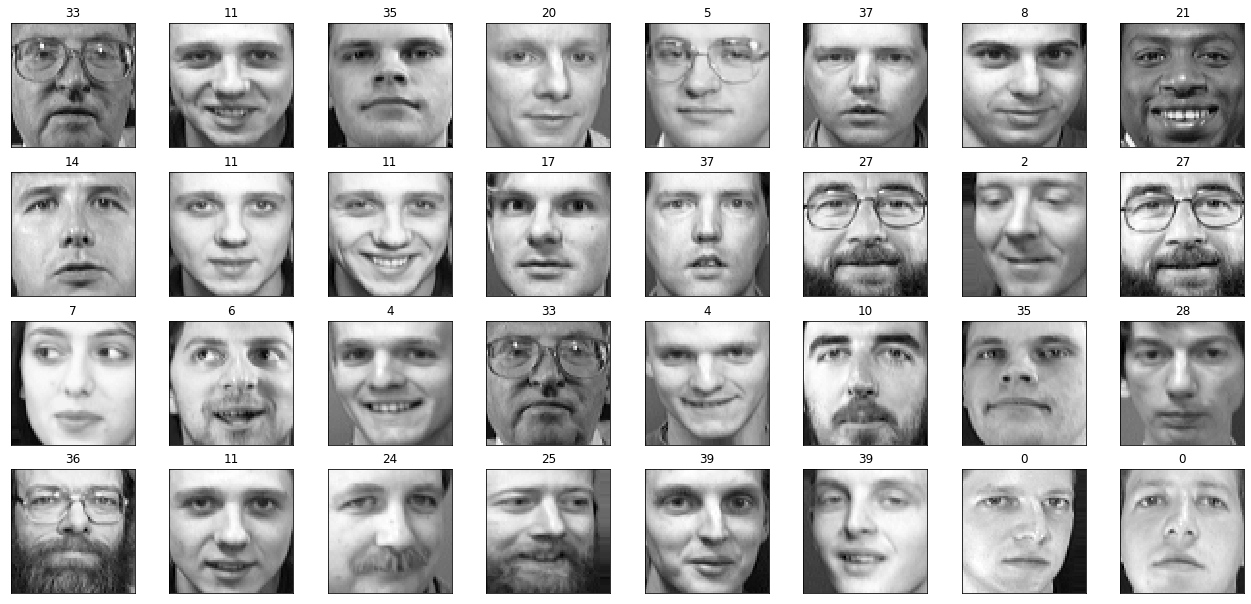

In [0]:
"""
Please remember to comment out this code before downloading your .py file.
"""

# recovered_images=[reconstruction(P, C, M, h, w, i) for i in range(len(X_images))]
# plot_portraits(recovered_images, y_names, h, w, n_row=4, n_col=8)

### Question 4.2 Answer on Latex
Paste the portrait reconstructions on LaTeX.
1. Compare the reconstructed images to the original images. How are they similar and how are they different?
1. What  do  you  expect  to  see  from  the  reconstructed  images  as  the  number  of  principalcomponents chosen for PCA increases?  Please explain why.

## Explanation of Variance and Reconstruction Error

Make 3 plots. 
1. One with the reconstruction error over the number of components used. Plot the average of the reconstruction error for the first 50 images over reconstructions with varying number of components, normalized to the range of 0-1.
1. One with the eigenvalues from largest to smallest. 
1. And lastly, one with the cumulative (sum of) eigenvectors used per number of principal components (this is known as explained variance), normalized to the range of 0-1.

In [0]:
"""
Please remember to comment out this code before downloading your .py file.
"""

# print('n_features', n_features)
# print('X_images.shape', X_images.shape)
# print('h', h)
# print('w', w)
# P, C, eig_vals, M, Y = pca2(X_images, n_features)

# reconst_errors = []
# for i in range(X_images.shape[0]):
#   dist = 0
#   for j in range(50):    
#     reconst_img = reconstruction(P[:, :i+1], C[:i+1, :], M, h, w, j)
#     dist += np.linalg.norm(np.array(reconst_img).flatten() - np.array(X_images[j]))
#   reconst_errors.append(dist/50)

n_features 4096
X_images.shape (400, 4096)
h 64
w 64
u.shape (400, 400)
s.shape (400,)
vh.shape (400, 4096)
components.shape (400, 4096)
(n_pc, p) (4096, 4096)
projected.shape (400, 400)
(n, min(n, n_pc)) (400, 400)


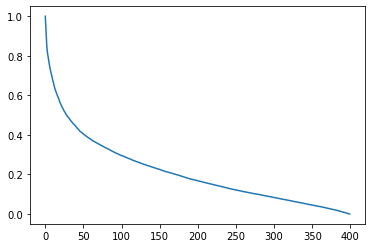

In [0]:
"""
Plot reconstruction error for one image normalized.

Please remember to comment out this code before downloading your .py file.
"""

# plt.plot(reconst_errors/reconst_errors[0])

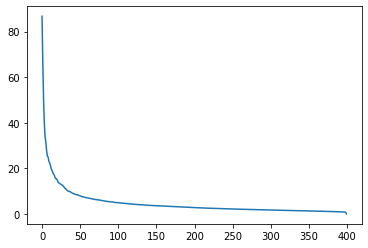

In [0]:
"""
Plot eigenvalues.

Please remember to comment out this code before downloading your .py file.
"""

# plt.plot(eig_vals)

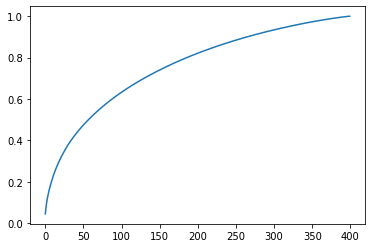

In [0]:
"""
Plot cumulative eigenvalues over the number of components used.

Please remember to comment out this code before downloading your .py file.
"""

# tot = sum(eig_vals)
# var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)

# plt.plot(cum_var_exp)

### Question 4.3 Answer on Latex
Paste the graphs into LaTeX.
1. How do you expect (based on theory; please be precise!) the plot of variance explained as the number of components to relate to the eigenvalues of the corresponding components?
1. What is the relation between reconstruction error and the variance explained?

# Turning it in


**Remember to recomment all script portions of this notebook before submitting (i.e. any code not in a function). This is to ensure that the Autograder works properly. Also make sure you did not edit other sections of the code outside of specified areas.**

1. Download this notebook as a `hw5.py` file with the functions implemented and other code commented out
  - Go to "File -> Download .py"
  
2. Submit `hw5.py` file to Gradescope (you can do this as many times as you'd like before the deadline)